# Classifying Composers
    In this project I will be taking a dataset of MIDI files and analyzing each file
    for their time, note, and velocity (how hard the note is hit).

## 1. Defining the Problem

    Background: The idea behind this project is to see whether we can use both
                the mean and standard deviation of a song's duration, notes,
                and velocity to determine composers. The idea is that each composer
                may offer their own unique style of composition which may be seen
                by incorporating the time, notes, and velocity. Even if the classification
                results are low, this could help determine a more "generic" composer
                from a more unique one. 
                
                It should be noted that music theory has been passed down for many
                centuries. Each time, music has reached a higher level in terms of
                complexity. Song duration, note arrangement, and use of velocity are
                the key features that can be used to analyze a piece of music.
                Rhythm can also be measured, however in this case is may not be
                useful as each of these pieces are piano sonatas/solos, thus 
                rhythm may be more minimal than an average orchestra piece.

## 2. The Data

    Data:       This project uses the MIDI dataset from Maestro. The way this is set up
                is a bit annoying. We will use a CSV file to associate composer names and
                composition titles to their respective MIDI file name. From there the 
                data is converted to a dataframe holding various information such as note
                mean/standard deviation, time mean/std, and velocity mean/std. We will choose
                4 composers at random and split into train and test sets 80/20 split. 
                Then we will use the RandomForestClassifier to test my hypothesis.
                NOTE!: The 'notes' of a midi file are numbers. 'Middle C' is 60.

## 3. Evaluate

We start off with the imports that we will need

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mido import MidiFile # This import allows us to read midi files
from sklearn.model_selection import train_test_split # Easy way to split the data fairly
from sklearn.ensemble import RandomForestClassifier # Model we will use for the first analysis

Lets take a look at that CSV file

In [2]:
comp_data = pd.read_csv("maestro-v3.0.0.csv")
comp_data
# comp_data.groupby("canonical_composer").mean() # Easy way to see all the artist names

,canonical_composer,canonical_title,split,year,midi_filename,audio_filename,duration
0,Alban Berg,Sonata Op. 1,train,2018,2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R...,2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R...,698.661160
1,Alban Berg,Sonata Op. 1,train,2008,2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...,2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...,759.518471
2,Alban Berg,Sonata Op. 1,train,2017,2017/MIDI-Unprocessed_066_PIANO066_MID--AUDIO-...,2017/MIDI-Unprocessed_066_PIANO066_MID--AUDIO-...,464.649433
3,Alexander Scriabin,"24 Preludes Op. 11, No. 13-24",train,2004,2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...,2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...,872.640588
4,Alexander Scriabin,"3 Etudes, Op. 65",validation,2006,2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MI...,2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MI...,397.857508
...,...,...,...,...,...,...,...
1271,Wolfgang Amadeus Mozart,"Sonata in F Major, K280",test,2004,2004/MIDI-Unprocessed_XP_14_R1_2004_04_ORIG_MI...,2004/MIDI-Unprocessed_XP_14_R1_2004_04_ORIG_MI...,241.470442
1272,Wolfgang Amadeus Mozart,"Sonata in F Major, K280",train,2004,2004/MIDI-Unprocessed_XP_14_R1_2004_04_ORIG_MI...,2004/MIDI-Unprocessed_XP_14_R1_2004_04_ORIG_MI...,114.696243
1273,Wolfgang Amadeus Mozart,"Sonata in F Major, K533",validation,2004,2004/MIDI-Unprocessed_SMF_12_01_2004_01-05_ORI...,2004/MIDI-Unprocessed_SMF_12_01_2004_01-05_ORI...,1139.198478
1274,Wolfgang Amadeus Mozart,"Sonata in F Major, K533/K494",validation,2018,2018/MIDI-Unprocessed_Recital17-19_MID--AUDIO_...,2018/MIDI-Unprocessed_Recital17-19_MID--AUDIO_...,1068.751602


We can ignore the train/test split that Maestro has done. We only want the composer, title, and filename.
Let's choose 4 composers and create a dataframe of their work and midi filenames.
I chose Mozart, Scriabin, Beethoven, and Johann Sebastian Bach because this will cover all 4 eras of classical music,
classical, modern, romantic, and baroque respectively.

In [4]:
comp_data_mozart = comp_data[comp_data.canonical_composer == "Wolfgang Amadeus Mozart"]
comp_data_scriabin = comp_data[comp_data.canonical_composer == "Alexander Scriabin"]
comp_data_beethoven = comp_data[comp_data.canonical_composer == "Ludwig van Beethoven"]
comp_data_bach = comp_data[comp_data.canonical_composer == "Johann Sebastian Bach"]

# We need to put the frames together. We need an even amount of compositions
# so we will go with the minimum amount

min = np.min([comp_data_mozart.shape[0], 
              comp_data_scriabin.shape[0],
              comp_data_beethoven.shape[0], 
              comp_data_bach.shape[0]])

# Combine and reset index
our_ref_data = pd.concat([comp_data_mozart[:min], comp_data_scriabin[:min], comp_data_beethoven[:min], comp_data_bach[:min]])
our_ref_data.reset_index(drop=True)

,canonical_composer,canonical_title,split,year,midi_filename,audio_filename,duration
0,Wolfgang Amadeus Mozart,Fantasy in C Min,train,2006,2006/MIDI-Unprocessed_07_R1_2006_01-04_ORIG_MI...,2006/MIDI-Unprocessed_07_R1_2006_01-04_ORIG_MI...,691.770142
1,Wolfgang Amadeus Mozart,"Nine Variations, K. 264",train,2009,2009/MIDI-Unprocessed_04_R1_2009_01-03_ORIG_MI...,2009/MIDI-Unprocessed_04_R1_2009_01-03_ORIG_MI...,735.747128
2,Wolfgang Amadeus Mozart,"Nine variations on a minuet by Duport, K537",train,2018,2018/MIDI-Unprocessed_Chamber2_MID--AUDIO_09_R...,2018/MIDI-Unprocessed_Chamber2_MID--AUDIO_09_R...,581.409675
3,Wolfgang Amadeus Mozart,"Rondo in A Minor, K. 511",test,2011,2011/MIDI-Unprocessed_05_R1_2011_MID--AUDIO_R1...,2011/MIDI-Unprocessed_05_R1_2011_MID--AUDIO_R1...,500.815471
4,Wolfgang Amadeus Mozart,Sonata K. 457,train,2006,2006/MIDI-Unprocessed_24_R1_2006_01-05_ORIG_MI...,2006/MIDI-Unprocessed_24_R1_2006_01-05_ORIG_MI...,937.038326
...,...,...,...,...,...,...,...
135,Johann Sebastian Bach,"Prelude and Fugue in A Minor, WTC I, BWV 865",train,2011,2011/MIDI-Unprocessed_25_R1_2011_MID--AUDIO_R1...,2011/MIDI-Unprocessed_25_R1_2011_MID--AUDIO_R1...,303.235541
136,Johann Sebastian Bach,"Prelude and Fugue in A Minor, WTC I, BWV 865",train,2017,2017/MIDI-Unprocessed_067_PIANO067_MID--AUDIO-...,2017/MIDI-Unprocessed_067_PIANO067_MID--AUDIO-...,309.229254
137,Johann Sebastian Bach,"Prelude and Fugue in A Minor, WTC II, BWV 889",train,2011,2011/MIDI-Unprocessed_06_R1_2011_MID--AUDIO_R1...,2011/MIDI-Unprocessed_06_R1_2011_MID--AUDIO_R1...,241.377964
138,Johann Sebastian Bach,"Prelude and Fugue in A Minor, WTC II, BWV 847",train,2013,2013/ORIG-MIDI_03_7_6_13_Group__MID--AUDIO_09_...,2013/ORIG-MIDI_03_7_6_13_Group__MID--AUDIO_09_...,220.773016


We will now use this dataframe to create a new dataframe holding every note as a row. This next cell will take a long time to run.

In [6]:
# Make a Dataframe holding each son
song_count = 0 
mididict = []

for i in our_ref_data.iterrows():
    midi = MidiFile(f'midi_files/{our_ref_data.iloc[song_count].midi_filename}', clip=True)
    mem1 = 0
    time = 0
    for j in midi:
        if j.type == 'note_on':
            # Time in the midi files had to be adjusted to reflect the duration of each song
            time = j.time + mem1 
            j.time = time
            mem1 = j.time
            diction = j.dict()
            diction.update({'composer': our_ref_data.iloc[song_count].canonical_composer}) 
            diction.update({'song': our_ref_data.iloc[song_count].canonical_title})
            mididict.append(diction)   
    song_count = song_count + 1
    
# Making the dataframe
mid = pd.DataFrame.from_dict(mididict)
mid_scriabin = mid[mid.composer == "Alexander Scriabin"]
mid_mozart = mid[mid.composer == "Wolfgang Amadeus Mozart"]
mid_beethoven = mid[mid.composer == "Ludwig van Beethoven"]
mid_bach = mid[mid.composer == "Johann Sebastian Bach"]
mid_scriabin, mid_mozart, mid_beethoven, mid_bach

(           type        time  channel  note  velocity            composer  \
 281310  note_on    0.596875        0    70        55  Alexander Scriabin   
 281311  note_on    0.639583        0    66        39  Alexander Scriabin   
 281312  note_on    0.663542        0    58        20  Alexander Scriabin   
 281313  note_on    1.278125        0    48        28  Alexander Scriabin   
 281314  note_on    1.752083        0    49        36  Alexander Scriabin   
 ...         ...         ...      ...   ...       ...                 ...   
 651931  note_on  250.552083        0    32         0  Alexander Scriabin   
 651932  note_on  253.222656        0    32        29  Alexander Scriabin   
 651933  note_on  253.408854        0    32         0  Alexander Scriabin   
 651934  note_on  261.106771        0    72         0  Alexander Scriabin   
 651935  note_on  261.746094        0    68         0  Alexander Scriabin   
 
                                  song  
 281310  24 Preludes Op. 11, No. 

In [8]:
# reset all the index
mid_mozart = mid_mozart.reset_index(drop=True)
mid_scriabin = mid_scriabin.reset_index(drop=True)
mid_beethoven = mid_beethoven.reset_index(drop=True)
mid_bach = mid_bach.reset_index(drop=True)

#example test
mid_bach

,type,time,channel,note,velocity,composer,song
0,note_on,0.936198,0,62,65,Johann Sebastian Bach,"Chromatic Fantasy and Fugue in D Minor, BWV 903"
1,note_on,1.105469,0,64,86,Johann Sebastian Bach,"Chromatic Fantasy and Fugue in D Minor, BWV 903"
2,note_on,1.149740,0,62,0,Johann Sebastian Bach,"Chromatic Fantasy and Fugue in D Minor, BWV 903"
3,note_on,1.209635,0,65,79,Johann Sebastian Bach,"Chromatic Fantasy and Fugue in D Minor, BWV 903"
4,note_on,1.250000,0,64,0,Johann Sebastian Bach,"Chromatic Fantasy and Fugue in D Minor, BWV 903"
...,...,...,...,...,...,...,...
284063,note_on,205.937500,0,33,75,Johann Sebastian Bach,"Prelude and Fugue in A Minor, WTC II, BWV 889"
284064,note_on,205.951042,0,40,0,Johann Sebastian Bach,"Prelude and Fugue in A Minor, WTC II, BWV 889"
284065,note_on,207.688542,0,33,0,Johann Sebastian Bach,"Prelude and Fugue in A Minor, WTC II, BWV 889"
284066,note_on,207.715625,0,61,0,Johann Sebastian Bach,"Prelude and Fugue in A Minor, WTC II, BWV 889"


The above modification allows us to visualize the songs. This format makes it so that every song would be plot at once so we will show an example portion of a bach compostion.

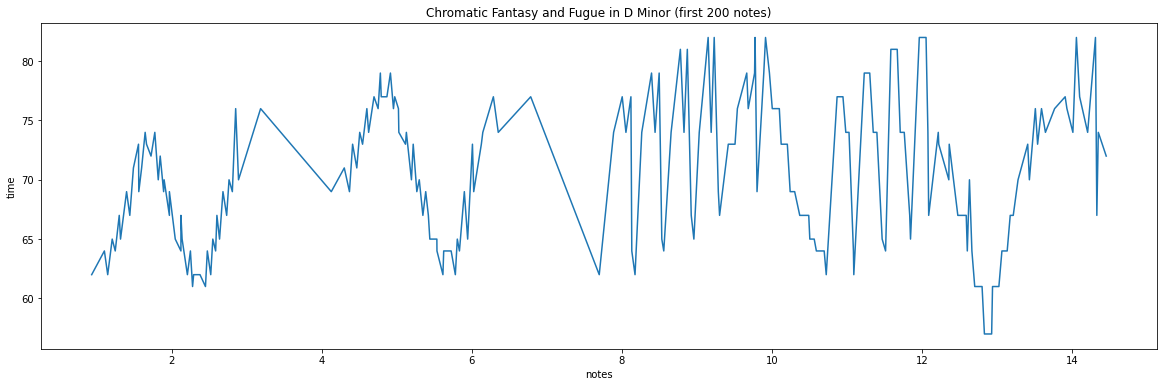

In [17]:
fig, ax = plt.subplots(figsize=(20,6))
ax.plot(mid_bach[:200].time, mid_bach[:200].note)
ax.set(title="Chromatic Fantasy and Fugue in D Minor (first 200 notes)",
       xlabel="notes",
       ylabel="time");

Notice the way the notes are structured paired with time. This is a good visualization but it is lacking the velocity data. 


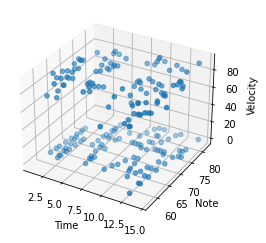

In [20]:
 from mpl_toolkits.mplot3d import Axes3D
 fig = plt.figure()
 ax = fig.add_subplot(111, projection='3d')
 ax.scatter(mid_bach[:200].time, mid_bach[:200].note, mid_bach[:200].velocity);

 ax.set(xlabel='Time',
        ylabel='Note',
        zlabel='Velocity');

## 4. Features

We will know convert the dataframes into a form that will allow us to run Random Forest Classifier

In [9]:
mozart_stats = mid_mozart.groupby(['composer', 'song']).std().reset_index()
mozart_stats = mozart_stats.drop('channel', axis=1) # our data is all 1 instrument
mean = mid_mozart.groupby(['composer', 'song']).mean().reset_index()
mozart_stats['note_mean'] = mean['note']
mozart_stats['time_mean'] = mean['time']
mozart_stats['velocity_mean'] = mean['velocity']
mozart_stats = mozart_stats.rename(columns={'note': 'note_std', 
                                                'time': 'time_std', 
                                                'velocity': 'velocity_std'})

scriabin_stats = mid_scriabin.groupby(['composer', 'song']).std().reset_index()
scriabin_stats = scriabin_stats.drop('channel', axis=1)
mean = mid_scriabin.groupby(['composer', 'song']).mean().reset_index()
scriabin_stats['note_mean'] = mean['note']
scriabin_stats['time_mean'] = mean['time']
scriabin_stats['velocity_mean'] = mean['velocity']
scriabin_stats = scriabin_stats.rename(columns={'note': 'note_std', 
                                                'time': 'time_std', 
                                                'velocity': 'velocity_std'})

beethoven_stats = mid_beethoven.groupby(['composer', 'song']).std().reset_index()
beethoven_stats = beethoven_stats.drop('channel', axis=1)
mean = mid_beethoven.groupby(['composer', 'song']).mean().reset_index()
beethoven_stats['note_mean'] = mean['note']
beethoven_stats['time_mean'] = mean['time']
beethoven_stats['velocity_mean'] = mean['velocity']
beethoven_stats = beethoven_stats.rename(columns={'note': 'note_std', 
                                                'time': 'time_std', 
                                                'velocity': 'velocity_std'})

bach_stats = mid_bach.groupby(['composer', 'song']).std().reset_index()
bach_stats = bach_stats.drop('channel', axis=1)
mean = mid_bach.groupby(['composer', 'song']).mean().reset_index()
bach_stats['note_mean'] = mean['note']
bach_stats['time_mean'] = mean['time']
bach_stats['velocity_mean'] = mean['velocity']
bach_stats = bach_stats.rename(columns={'note': 'note_std', 
                                                'time': 'time_std', 
                                                'velocity': 'velocity_std'})

In [10]:
bach_stats

,composer,song,time_std,note_std,velocity_std,note_mean,time_mean,velocity_mean
0,Johann Sebastian Bach,"Chromatic Fantasy and Fugue in D Minor, BWV 903",161.103619,10.215811,36.068815,63.965585,285.520347,34.353735
1,Johann Sebastian Bach,"Duet in E Minor, BWV 802",31.617970,10.801665,29.163093,62.717304,54.579257,28.012072
2,Johann Sebastian Bach,"Duet in G, BWV 804",31.368925,10.450928,31.381545,62.643529,56.160457,30.363341
3,Johann Sebastian Bach,"English Suite No. 2 in A Minor, BWV 807, I. P...",77.865978,9.827352,35.465308,61.564012,138.180646,34.563044
4,Johann Sebastian Bach,"English Suite in A Minor, BWV 807",202.708119,10.338627,35.262496,63.637077,331.133995,34.164710
5,Johann Sebastian Bach,"English Suite no. 3 in G Minor, Prelude",37.196560,10.593615,37.695796,63.840376,67.804005,36.928084
6,Johann Sebastian Bach,French Suite No. 5 in G Major,160.658149,11.553951,34.440664,64.162849,244.060657,33.108634
7,Johann Sebastian Bach,"Italian Concerto in F Major, BWV 971 (Complete)",160.412703,10.769887,37.521256,64.412861,278.743933,36.538366
8,Johann Sebastian Bach,"Italian Concerto, BWV 971",143.064001,10.766398,32.789752,64.406851,253.976953,31.171985
9,Johann Sebastian Bach,"Italian Concerto, BWV 971 (Complete)",166.045742,10.763296,34.415858,64.369074,286.345035,33.168210


### Notes on the features
    1. The time standard deviation is not important to the data since the time is monotonic in its growth for song. The mean however reflects the duration of each song. Perhaps the original structure of time would be a better indicator of deviation between notes.
       
    2. A more complicated melody will make use of the piano's full 8 octave range, thus the note std and mean are useful features.
       
    3. Velocity is a measure of how hard or soft a note hits. Since this has a heavy effect on tone, the std and mean of this are valuable features to have here.

## 5. Modeling

First let's seperate our training and test data

In [26]:
# Combine all stats dataframes
stats = pd.concat([mozart_stats, scriabin_stats, beethoven_stats, bach_stats])

# Seperate features and labels
X = stats.drop('composer', axis=1) # we need the features
X = X.drop('song', axis=1)
y = stats.composer

# split into train and tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train);

In [27]:
clf.score(X_train, y_train) # how well the train set was for the model

0.9888888888888889

In [28]:
clf.score(X_test, y_test)

0.6956521739130435

This method of classification had an accuracy of about 70%. This is decent but we use only 10 n-estimators (numbers of random decision trees we make in Random Forest Classification).

In [30]:
np.random.seed(42)
for i in range(10,101,10):
     print(f"Trying model with {i} estimators...")
     clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
     print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
     print("")

Trying model with 10 estimators...
Model accuracy on test set: 69.57%

Trying model with 20 estimators...
Model accuracy on test set: 69.57%

Trying model with 30 estimators...
Model accuracy on test set: 73.91%

Trying model with 40 estimators...
Model accuracy on test set: 73.91%

Trying model with 50 estimators...
Model accuracy on test set: 69.57%

Trying model with 60 estimators...
Model accuracy on test set: 73.91%

Trying model with 70 estimators...
Model accuracy on test set: 78.26%

Trying model with 80 estimators...
Model accuracy on test set: 78.26%

Trying model with 90 estimators...
Model accuracy on test set: 73.91%

Trying model with 100 estimators...
Model accuracy on test set: 78.26%



The Random Forest Classification method had a maximum accuracy of 78.26%. Not too bad, but this isn't a great model. We'll discuss this a bit in part 6.

## 6. Experimentation

I am still learning many of the useful tools in the Sci Kit Learn library so there is not much I can do at the moment. However I have some ideas.
    
    1. Since we can form time series, we can compute distances between the note values of 2 songs. Eucliden distances sound great, however since each song will have a varying amount of notes per time we will need Dynamic Time Warping. We can then use some form of K-Nearest Neighbor to classify the time series. This would potentially restrict us to 2 features only.
    
    2. Topological Data Analysis has methods for time series involving cubicle sublevel set filtration that will come in handy. TDA deals with the shape and connected-ness of a dataset and can reflect the shape of the time series shown earlier. To incorporate >2 features, we can use the Vietoris-Rips complex as our metric.